# Final results 

In [1]:
import os
import pandas as pd

output_dir = "/home/koutchc1/learnlab2023/outputs"
dataframe = pd.read_csv(os.path.join(output_dir, "curveplot_success_rate_by_type_student_data.csv"), 
                        index_col=False)
dataframe = dataframe.drop(columns={"Unnamed: 0"})
dataframe

,student_id,success_rate
0,000f96b7-ba0e-43ce-a5c3-c8fc0a6406f0,0.967033
1,004362ba-cb75-400b-a279-c9f54e3dde5d,0.980198
2,007b3513-a877-44c0-b841-0a9ff14ef6b4,0.861702
3,007b944d-77d2-457f-b0e8-81b2fd80dbf6,0.910112
4,007f6785-388a-4dee-8cc8-e1c903fd78e2,0.993243
...,...,...
1556,ff432c98-bc60-44c5-94d0-06d8266d7613,1.000000
1557,ff85550f-ff7f-4c86-b13e-c327c8d6defd,0.949580
1558,ff9215d2-3ee5-4952-acab-2a619bdd59f9,0.891304
1559,ff97afb3-c8cd-468a-857b-328868626a3c,0.846154


In [2]:
output_dir = "/home/koutchc1/learnlab2023/outputs"
dataframe = pd.read_csv(os.path.join(output_dir, "curveplot_avg_by_type_student_data.csv"))
dataframe

,Unnamed: 0,student_id,score
0,0,b20f15db-e55c-4066-9910-331480eb42c0,0.000000
1,1,c83c8eec-b656-441d-9f75-f10c981f590a,28.863636
2,2,9b3f30f0-9d78-4209-aa46-1beff8705122,30.000000
3,3,0361085d-63da-48d7-ac0d-4ba1cb38bdce,30.189189
4,4,73080562-d3d8-4753-ab04-96f38c2f7d39,43.750000
...,...,...,...
1557,1557,1f21fa0d-0904-4589-a67f-fc64d6366ebd,100.000000
1558,1558,0aa046b4-4171-41dc-a24b-a72e88dab3d8,100.000000
1559,1559,2c4f2b9d-ca1f-4f62-a08e-a9b2a459f246,100.000000
1560,1560,db1a02d9-b667-4442-802c-bd6ef9899fae,100.000000


In [3]:
output_dir = "/home/koutchc1/learnlab2023/outputs"
student_dataframe = pd.read_csv(os.path.join(output_dir, "scatterplot_avg_score_student_data.csv"))
student_dataframe = student_dataframe.drop(columns={"Unnamed: 0"})
student_dataframe

,problem_id,student_avg_score,type
0,Airstrike,0.000000,project
1,FileIO_echo,95.792079,lab
2,FileIO_runways,94.315245,lab
3,FileIO_survivors_by_gender,87.060302,lab
4,FileIO_titanicfares,61.363636,lab
...,...,...,...
413,lsn9_skill2,99.242424,skill
414,lsn9_skill3,98.737374,skill
415,lsn9_triangle,98.383085,lab
416,pex1,96.869474,project


In [7]:
def load_model_results(model):
    path = f"/home/koutchc1/learnlab2023/outputs/{model}_v1_result_new.csv"
    llm_df = pd.read_csv(path)
    llm_df["model"] = model
    llm_df["accuracy"] = (llm_df["score"] == 100)
    llm_df = llm_df.drop(columns={"Unnamed: 0", "Unnamed: 0.1"})
    llm_df = llm_df[llm_df["exec_result"] == "completed"]
    return llm_df

In [8]:
gpt4_results = load_model_results("gpt-4")
gpt3_results = load_model_results("gpt-3.5-turbo")

In [10]:
gpt4_results.groupby("type").accuracy.mean()

type
lab      0.415730
skill    0.507812
Name: accuracy, dtype: float64

In [9]:
gpt3_results.groupby("type").accuracy.mean()

type
lab      0.366337
skill    0.392308
Name: accuracy, dtype: float64

In [127]:
gpt3_results.columns

Index(['id', 'course_id', 'type', 'exam', 'prompt', 'testcase', 'max_score',
       'input_str', 'input_cast', 'output', 'assignment', 'conditional',
       'function_call', 'function_def', 'function_return', 'loop_counting',
       'loop_until', 'loop_elements', 'loop_nested', 'stat_calculate',
       'file_read', 'file_write', 'list', 'list_2d', 'dictionary', 'item_set',
       'tuple', 'skeleton', 'model', 'code', 'exec_result', 'score', 'text'],
      dtype='object')

In [124]:
d = gpt3_results[(gpt3_results.score == 100)]

for pid, p, c, t, tc in zip(d["id"], d["prompt"], d["code"], d["text"], d["testcase"]):
    print(pid, p, "code", c, "res", t)
    print("--------------")
    print()

lsn8_fuel Bellow is a problem statement, write a program in Python that solves the problem.Put your code solution within fenced code blocks, and do not provide explanations for your solution. 
**PROBLEM STATEMENT:**

Write an algorithm that gets a fuel load (in lbs) and then a distance to base
(in nautical miles). You may assume all inputs are non-negative numbers.

It then outputs what kind of action the pilot should take. If the fuel load is
less than 50 lbs and the distance to base is less than 70 nm, report "Return
to base", otherwise, report "Resume flight".

**EXAMPLES:**

| Example 1 | Example 2 | Example 3 | Example 4  
---|---|---|---|---  
Input | 30  
60 | 60  
60 | 40  
80 | 60  
80  
Output | Return to base | Resume flight | Resume flight | Resume flight  
  
**Note: Output must match exactly.**


 code 
fuel_load = int(input("Enter fuel load (lbs): "))
distance = int(input("Enter distance to base (nm): "))

if fuel_load < 50 and distance < 70:
    print("Return to base")


In [125]:
d = gpt4_results[gpt4_results.id == "lsn5_skill1"]
print(d.code.iloc[0])


name = "Your Name"



In [105]:
llm_results = pd.merge(gpt3_results, gpt4_results, on="id")
llm_results

,id,course_id_x,type_x,exam_x,prompt_x,testcase_x,max_score_x,input_str_x,input_cast_x,output_x,...,list_2d_y,dictionary_y,item_set_y,tuple_y,skeleton_y,model_y,code_y,exec_result_y,score_y,text_y
0,a3_3_animals,2,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,0,1,...,0,0,0,0,# AUTOGRADER IMPORT REMOVED\n\n# -------------...,gpt-4,\n# Print out each item in the list.\nfor anim...,completed,0.0,Unit Test Returned: 0.0\n
1,a3_1_cargo,2,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\nimport random, m...",100,0,1,1,...,0,0,0,0,NaN,gpt-4,\n# List of planes\nlist_of_cargo_planes = ['P...,completed,0.0,----------------------------------------------...
2,a3_3_games,2,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,0,1,...,0,0,0,0,# AUTOGRADER IMPORT REMOVED\n\n# -------------...,gpt-4,\nfor game in list_of_games:\n print(game)\n,completed,0.0,Unit Test Returned: 0.0\n
3,lsn9_practice4,2,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,1,1,...,0,0,0,0,NaN,gpt-4,\nacre_to_sq_miles = 0.0015625\nsq_km_to_sq_mi...,completed,100.0,--------------------------------------------\n...
4,lsn9_practice3,2,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,1,1,...,0,0,0,0,NaN,gpt-4,\n# Ask for price in USD\nprice_usd = float(in...,completed,0.0,Incorrect Pound Conversion. Expected 386.864\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Graphics2_bouncingtriangle,4,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,0,0,...,0,0,0,0,NaN,gpt-4,\nimport random\nimport pygame\nimport sys\n\n...,completed,0.0,There appears to be a syntax error in your cod...
285,Graphics2_bouncingball,4,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,0,0,...,0,0,0,0,NaN,gpt-4,\nimport random\nimport tkinter as tk\n\nclass...,completed,0.0,There appears to be a syntax error in your cod...
286,a3_3_chars3,4,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,0,1,...,0,0,0,0,# AUTOGRADER IMPORT REMOVED\n\n# -------------...,gpt-4,for character in list_of_characters:\n prin...,completed,0.0,INCORRECT: There was an error while running yo...
287,a3_3_chars2,4,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,0,1,...,0,0,0,0,# AUTOGRADER IMPORT REMOVED\n\n# -------------...,gpt-4,for i in list_of_characters:\n print(i),completed,0.0,INCORRECT: There was an error while running yo...


In [ ]:
llm_results = pd.merge(gpt3_results, gpt4_results, on="problem_id")

In [84]:
llm_df = llm_df[llm_df.id.isin(student_dataframe.problem_id)]
student_dataframe = student_dataframe[student_dataframe.problem_id.isin(llm_df.id)]
llm_df

,id,course_id,type,exam,prompt,testcase,max_score,input_str,input_cast,output,...,list_2d,dictionary,item_set,tuple,skeleton,model,code,exec_result,score,text
0,a3_3_animals,2,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,0,1,...,0,0,0,0,# AUTOGRADER IMPORT REMOVED\n\n# -------------...,gpt-4,\n# Print out each item in the list.\nfor anim...,completed,0.0,Unit Test Returned: 0.0\n
1,a3_1_cargo,2,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\nimport random, m...",100,0,1,1,...,0,0,0,0,NaN,gpt-4,\n# List of planes\nlist_of_cargo_planes = ['P...,completed,0.0,----------------------------------------------...
2,a3_3_games,2,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,0,1,...,0,0,0,0,# AUTOGRADER IMPORT REMOVED\n\n# -------------...,gpt-4,\nfor game in list_of_games:\n print(game)\n,completed,0.0,Unit Test Returned: 0.0\n
4,lsn9_practice4,2,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,1,1,...,0,0,0,0,NaN,gpt-4,\nacre_to_sq_miles = 0.0015625\nsq_km_to_sq_mi...,completed,100.0,--------------------------------------------\n...
5,lsn9_practice3,2,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,1,1,...,0,0,0,0,NaN,gpt-4,\n# Ask for price in USD\nprice_usd = float(in...,completed,0.0,Incorrect Pound Conversion. Expected 386.864\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,a3_3_chars3,4,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,0,1,...,0,0,0,0,# AUTOGRADER IMPORT REMOVED\n\n# -------------...,gpt-4,for character in list_of_characters:\n prin...,completed,0.0,INCORRECT: There was an error while running yo...
375,a3_3_chars2,4,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,0,1,...,0,0,0,0,# AUTOGRADER IMPORT REMOVED\n\n# -------------...,gpt-4,for i in list_of_characters:\n print(i),completed,0.0,INCORRECT: There was an error while running yo...
376,a3_3_chars1,4,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,0,1,...,0,0,0,0,# AUTOGRADER IMPORT REMOVED\n\n# -------------...,gpt-4,for character in list_of_characters:\n prin...,completed,0.0,INCORRECT: There was an error while running yo...
377,lsn33_practice8,2,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,1,1,...,1,0,0,0,NaN,gpt-4,\nimport csv\n\n# Read csv file\ndef read_file...,completed,0.0,1\nUnit Test Returned: 0.0\n


In [85]:
llm_df = llm_df.rename(columns={"score": "llm_score", "id": "problem_id"})

In [86]:
combined_df = pd.merge(llm_df, student_dataframe, on="problem_id")
combined_df

,problem_id,course_id,type_x,exam,prompt,testcase,max_score,input_str,input_cast,output,...,item_set,tuple,skeleton,model,code,exec_result,llm_score,text,student_avg_score,type_y
0,a3_3_animals,2,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,0,1,...,0,0,# AUTOGRADER IMPORT REMOVED\n\n# -------------...,gpt-4,\n# Print out each item in the list.\nfor anim...,completed,0.0,Unit Test Returned: 0.0\n,92.536585,skill
1,a3_1_cargo,2,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\nimport random, m...",100,0,1,1,...,0,0,NaN,gpt-4,\n# List of planes\nlist_of_cargo_planes = ['P...,completed,0.0,----------------------------------------------...,68.801527,skill
2,a3_3_games,2,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,0,1,...,0,0,# AUTOGRADER IMPORT REMOVED\n\n# -------------...,gpt-4,\nfor game in list_of_games:\n print(game)\n,completed,0.0,Unit Test Returned: 0.0\n,84.940541,skill
3,lsn9_practice4,2,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,1,1,...,0,0,NaN,gpt-4,\nacre_to_sq_miles = 0.0015625\nsq_km_to_sq_mi...,completed,100.0,--------------------------------------------\n...,96.795100,lab
4,lsn9_practice3,2,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,1,1,...,0,0,NaN,gpt-4,\n# Ask for price in USD\nprice_usd = float(in...,completed,0.0,Incorrect Pound Conversion. Expected 386.864\...,98.028446,lab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,a3_3_chars3,4,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,0,1,...,0,0,# AUTOGRADER IMPORT REMOVED\n\n# -------------...,gpt-4,for character in list_of_characters:\n prin...,completed,0.0,INCORRECT: There was an error while running yo...,71.825806,skill
284,a3_3_chars2,4,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,0,1,...,0,0,# AUTOGRADER IMPORT REMOVED\n\n# -------------...,gpt-4,for i in list_of_characters:\n print(i),completed,0.0,INCORRECT: There was an error while running yo...,66.248120,skill
285,a3_3_chars1,4,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,0,1,...,0,0,# AUTOGRADER IMPORT REMOVED\n\n# -------------...,gpt-4,for character in list_of_characters:\n prin...,completed,0.0,INCORRECT: There was an error while running yo...,61.316901,skill
286,lsn33_practice8,2,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,1,1,...,0,0,NaN,gpt-4,\nimport csv\n\n# Read csv file\ndef read_file...,completed,0.0,1\nUnit Test Returned: 0.0\n,84.027304,lab


/scratch/work/koutchc1/.conda_envs/learnlab2023/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


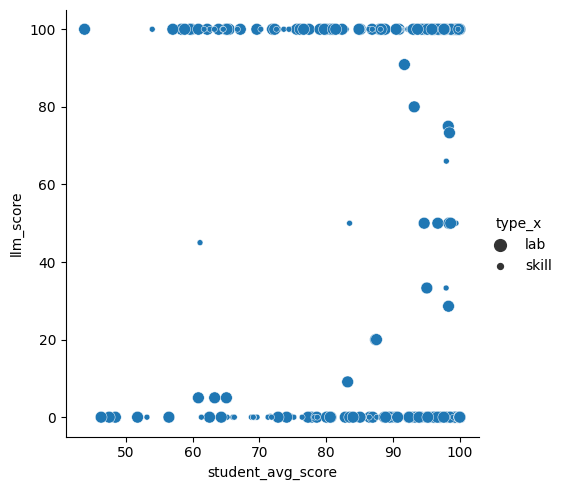

In [87]:
import seaborn as sns

sns.relplot(data=combined_df, x="student_avg_score", y="llm_score", size="type_x", size_order=["lab", "skill"])

/scratch/work/koutchc1/.conda_envs/learnlab2023/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


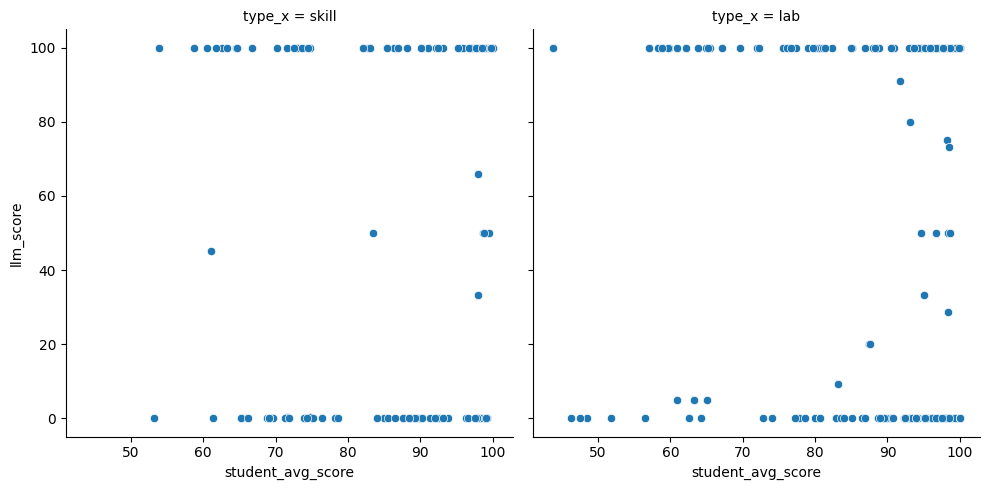

In [88]:
sns.relplot(data=combined_df, x="student_avg_score", y="llm_score", col="type_x")

In [99]:
d = combined_df[combined_df.llm_score == 0]

for p, c, t in zip(d["prompt"], d["code"], d["text"]):
    print("Prompt")
    print(p)
    print("Code")
    print(c)
    print("Failing")
    print(t)
    print("--------")

Prompt
Bellow is a problem statement, write a program in Python that solves the problem.Put your code solution within fenced code blocks, and do not provide explanations for your solution. 


**PROBLEM STATEMENT:  
** You have been provided with a list called `list_of_animals`. Write a
program that prints out each of the items in this list (one item per line).



**EXAMPLE:  
** If, for example, the list contained the items: "A", "B", "C"

Your program should print:

    
    
    A  
    B  
    C



**NOTE:**

  * You must use a loop to complete this task. 




# AUTOGRADER IMPORT REMOVED

# --------------------------------------------------------------
# Assessment #3, Problem 3
# --------------------------------------------------------------

# This list is being provided to you.  DO NOT TOUCH!
list_of_animals = ['Tiger', 'Deer', 'Zebra', 'Elephant', 'Swordfish', 'Giraffe', 'Sloth']

#Your code goes here.
Code

# Print out each item in the list.
for animal in list_of_animals:
    p

<Axes: xlabel='student_avg_score', ylabel='llm_score'>

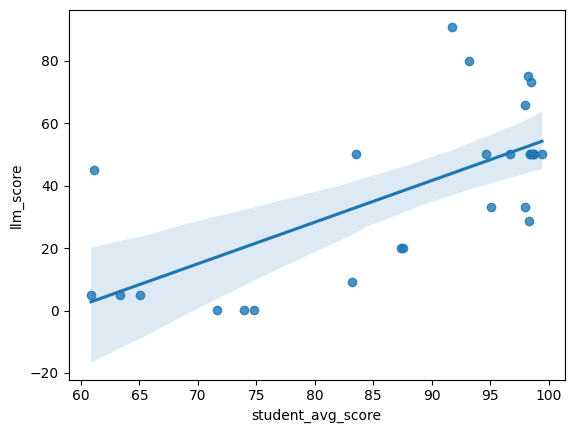

In [89]:
d = combined_df[(combined_df.llm_score > 0) & (combined_df.student_avg_score > 0) & (combined_df.llm_score < 100) & (combined_df.student_avg_score < 100)]
sns.regplot(data=d, x="student_avg_score", y="llm_score")

/scratch/work/koutchc1/.conda_envs/learnlab2023/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


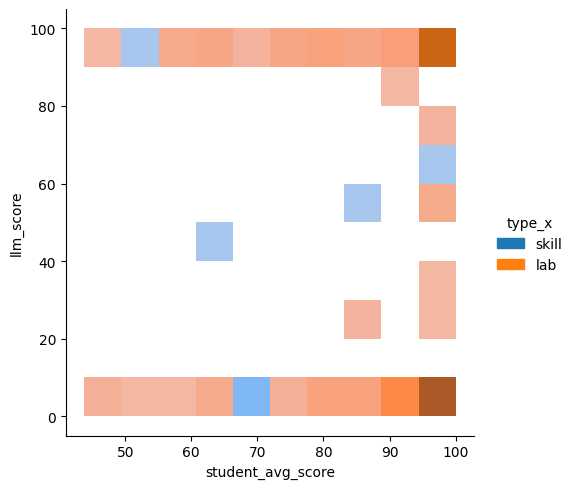

In [90]:
sns.displot(data=combined_df, x="student_avg_score", y="llm_score", hue="type_x")

/scratch/work/koutchc1/.conda_envs/learnlab2023/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


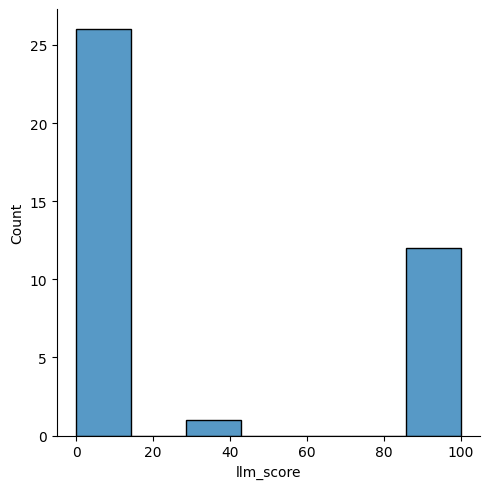

In [91]:
d = combined_df[combined_df.input_str.astype(bool)]
sns.displot(d, x="llm_score")

In [92]:
d

,problem_id,course_id,type_x,exam,prompt,testcase,max_score,input_str,input_cast,output,...,item_set,tuple,skeleton,model,code,exec_result,llm_score,text,student_avg_score,type_y
22,lsn5_madlib,2,lab,0,"Bellow is a problem statement, write a program...",from cs110 import autograder\r\nimport random\...,100,1,1,1,...,0,0,NaN,gpt-4,\nname = input().strip()\nrestaurant = input()...,completed,0.0,String doesn't match.\nExpected: Adrian went t...,92.917847,lab
28,lsn33_practice4,2,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,1,0,1,...,0,0,NaN,gpt-4,\nlandmarks = {}\nwhile True:\n key = input...,completed,0.0,Unit Test Returned: 0.0\n,90.357143,lab
29,lsn33_practice3,2,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,1,0,1,...,1,0,NaN,gpt-4,"\ndealer_1 = {""Ford"", ""Hyundai"", ""Volkswagen"",...",completed,33.3,----------------------\nTest Case 1\n---------...,95.071685,lab
30,lsn33_practice2,2,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,1,1,1,...,0,0,NaN,gpt-4,"\ndef calculate_travel_time(warp_factor, dista...",completed,0.0,----------------------\nTest Case 1\n---------...,77.784722,lab
35,lsn25_skill1,2,skill,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,1,0,0,...,0,0,NaN,gpt-4,"\naircraft_dict = {""F-16"": ""Fighting Falcon""}\...",completed,0.0,INCORRECT. Expected:\n{'F-16': 'Fighting Falco...,98.300971,skill
38,lsn25_contactlist,2,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,1,0,1,...,0,0,NaN,gpt-4,\ncontacts = {}\n\nwhile True:\n name = inp...,completed,100.0,Unit Test Returned: 100.0\n,85.129630,lab
39,lsn24_nasa,2,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,1,1,1,...,0,0,NaN,gpt-4,\nmissions = {}\nwhile True:\n mission = in...,completed,0.0,Unit Test Returned: 0.0\n,77.281022,lab
40,lsn24_mitches,2,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,1,1,1,...,0,0,NaN,gpt-4,\ndef analyze_food():\n meals = int(input()...,completed,0.0,Unit Test Returned: 0.0\n,86.966292,lab
41,lsn24_education,2,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,1,0,1,...,0,0,NaN,gpt-4,\nimport csv\n\n# Get user input\ncountry = in...,completed,0.0,Unit Test Returned: 0.0\n,80.188679,lab
55,lsn20_unpopularnames,2,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,1,1,1,...,0,0,NaN,gpt-4,\nimport csv\n\n# Get user inputs\ngender = in...,completed,0.0,\nUnit Test Returned: 0.0\n,78.591837,lab


/scratch/work/koutchc1/.conda_envs/learnlab2023/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


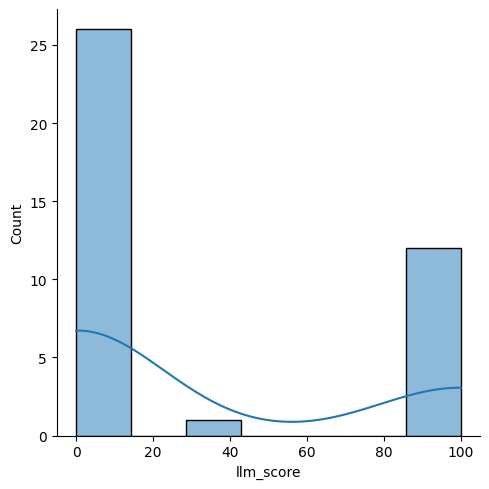

In [93]:
d = combined_df[combined_df.input_str.astype(bool)]
sns.displot(d, x="llm_score",kde=True)

In [ ]:
# gpt3.5_